In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pickle
from sklearn.metrics import mean_squared_error

In [6]:
#data = pd.read_csv(r"E:\CDAC\Project\Pune.csv")
#from google.colab import drive
#drive.mount('/content/drive')
# Load the file from Google Drive
#data = pd.read_csv("/content/drive/MyDrive/Datasets - Colab/Pune.csv")
data=pd.read_csv('/kaggle/input/temp-data/Jabalpur.csv')

In [7]:
#checking columns
data.columns

Index(['Date', 'PS', 'PSC', 'T2M', 'T2MWET', 'T2MDEW', 'WS2M', 'WD2M', 'WD10M',
       'WS10M', 'QV2M', 'RH2M', 'PRECTOTCORR'],
      dtype='object')

In [8]:
#dropping unrequired features
data=data.drop(['T2MDEW', 'T2MWET', 'PS', 'PSC', 'WS2M', 'QV2M', 'RH2M', 'PRECTOTCORR', 'WD2M', 'WD10M', 'WS10M'], axis=1)
data.head()

,Date,T2M
0,2004010109,20.64
1,2004010114,24.47
2,2004010406,8.66
3,2004010408,14.63
4,2004010410,21.73


In [9]:
# convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d%H')
data.head()

,Date,T2M
0,2004-01-01 09:00:00,20.64
1,2004-01-01 14:00:00,24.47
2,2004-01-04 06:00:00,8.66
3,2004-01-04 08:00:00,14.63
4,2004-01-04 10:00:00,21.73


In [10]:
#changing index to date
data.index = data['Date']
data.head()

,Date,T2M
Date,,
2004-01-01 09:00:00,2004-01-01 09:00:00,20.64
2004-01-01 14:00:00,2004-01-01 14:00:00,24.47
2004-01-04 06:00:00,2004-01-04 06:00:00,8.66
2004-01-04 08:00:00,2004-01-04 08:00:00,14.63
2004-01-04 10:00:00,2004-01-04 10:00:00,21.73


In [11]:
data=data.sort_index()

In [12]:
data.head()

,Date,T2M
Date,,
2004-01-01 05:00:00,2004-01-01 05:00:00,8.20
2004-01-01 06:00:00,2004-01-01 06:00:00,8.37
2004-01-01 07:00:00,2004-01-01 07:00:00,12.23
2004-01-01 08:00:00,2004-01-01 08:00:00,15.40
2004-01-01 09:00:00,2004-01-01 09:00:00,20.64


In [13]:
#Renaming columns
data.rename(columns={'T2M': 'TEMP'}, inplace=True)

In [14]:
#checking for duplicated entried
data.duplicated().sum()

120

In [15]:
#dropping duplicate values
data=data.drop_duplicates()
data.duplicated().sum()

0

In [16]:
data.tail()

,Date,TEMP
Date,,
2024-02-19 00:00:00,2024-02-19 00:00:00,20.65
2024-02-19 01:00:00,2024-02-19 01:00:00,20.17
2024-02-19 02:00:00,2024-02-19 02:00:00,19.74
2024-02-19 03:00:00,2024-02-19 03:00:00,19.41
2024-02-19 04:00:00,2024-02-19 04:00:00,18.98


In [17]:
data=data[:-5]
data.tail()

,Date,TEMP
Date,,
2024-02-18 19:00:00,2024-02-18 19:00:00,26.05
2024-02-18 20:00:00,2024-02-18 20:00:00,24.32
2024-02-18 21:00:00,2024-02-18 21:00:00,22.98
2024-02-18 22:00:00,2024-02-18 22:00:00,22.07
2024-02-18 23:00:00,2024-02-18 23:00:00,21.40


In [18]:
data.count()

Date    176491
TEMP    176491
dtype: int64

In [19]:
# Splitting data into train and test sets
train_data = data[:8760]  # 1 year data
test_data = data[8760:8808]   # Use the last 48 hours for testing

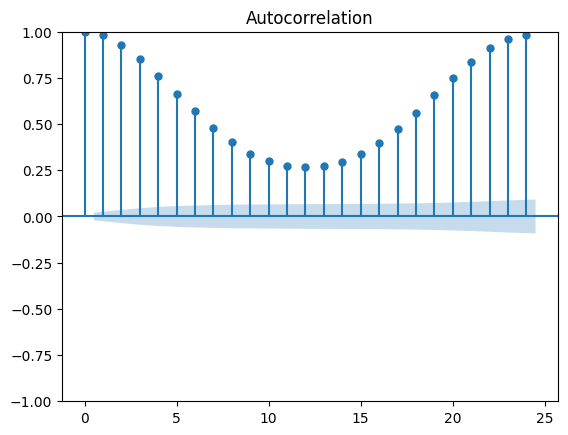

In [20]:
#plotting autocorrelation graph
plot_acf(train_data["TEMP"], lags=24, )
plt.show()

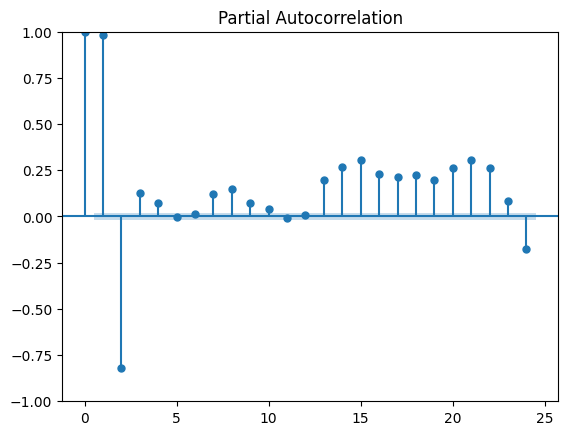

In [21]:
#plotting partial autocorrelation graph
plot_pacf(train_data["TEMP"], lags=24)
plt.show()

In [22]:
# SARIMA model parameters
order = (1, 1, 1)  # ARIMA parameters (p, d, q)
seasonal_order = (1, 1, 1, 24)  # SARIMA parameters (P, D, Q, S)

In [23]:
#to store RMSE after every year
rmse_record={}

In [24]:
# Fit SARIMA model
jabalpur_model = SARIMAX(train_data["TEMP"], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False, dates=train_data["Date"])
jabalpur_result = jabalpur_model.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.79400D-01    |proj g|=  4.65046D-01


 This problem is unconstrained.



At iterate    5    f=  2.58914D-01    |proj g|=  6.06615D-01

At iterate   10    f=  2.30490D-01    |proj g|=  3.35338D-02

At iterate   15    f=  2.29836D-01    |proj g|=  1.56195D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     25      1     0     0   7.421D-06   2.298D-01
  F =  0.22983591138855314     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [25]:
# Forecast temperatures for the next 48 hours
forecast = jabalpur_result.get_forecast(steps=48)

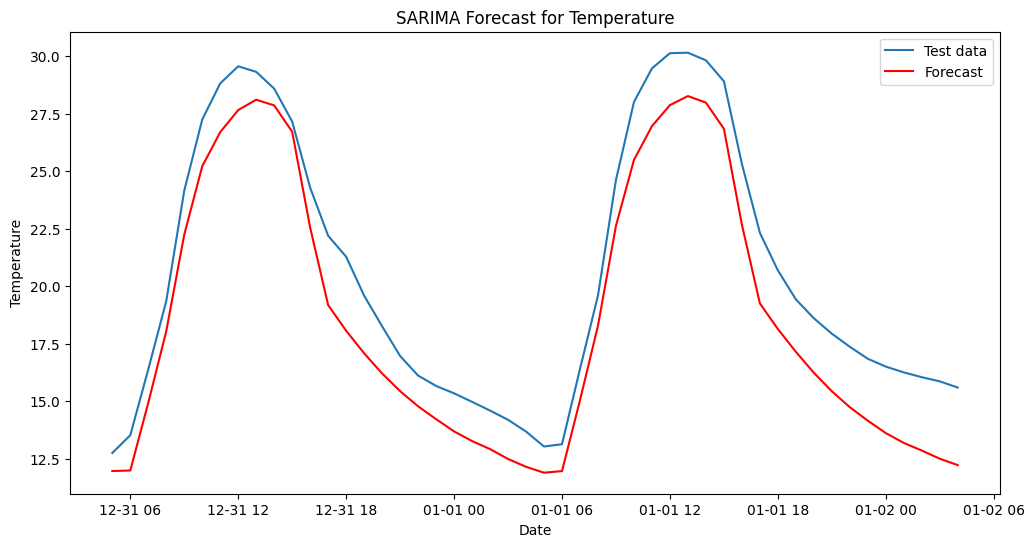

In [26]:
# Plot the predicted values along with the actual values
plt.figure(figsize=(12, 6))
#plt.plot(check.index, check["TEMP"], label='Train data')
plt.plot(test_data.index, test_data["TEMP"], label='Test data')
plt.plot(forecast.predicted_mean, label='Forecast', color='red')
#plt.plot(forecast.index, forecast.predicted_mean, label='Forecast', color='red')
#plt.fill_between(forecast.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.5)
plt.title('SARIMA Forecast for Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [27]:
rmse = np.sqrt(mean_squared_error(test_data["TEMP"], forecast.predicted_mean))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 2.14615835835248


In [28]:
rmse_record[1]=rmse

In [29]:
table=[8760*x for x in range(1, 21)]
#table

training now:  2


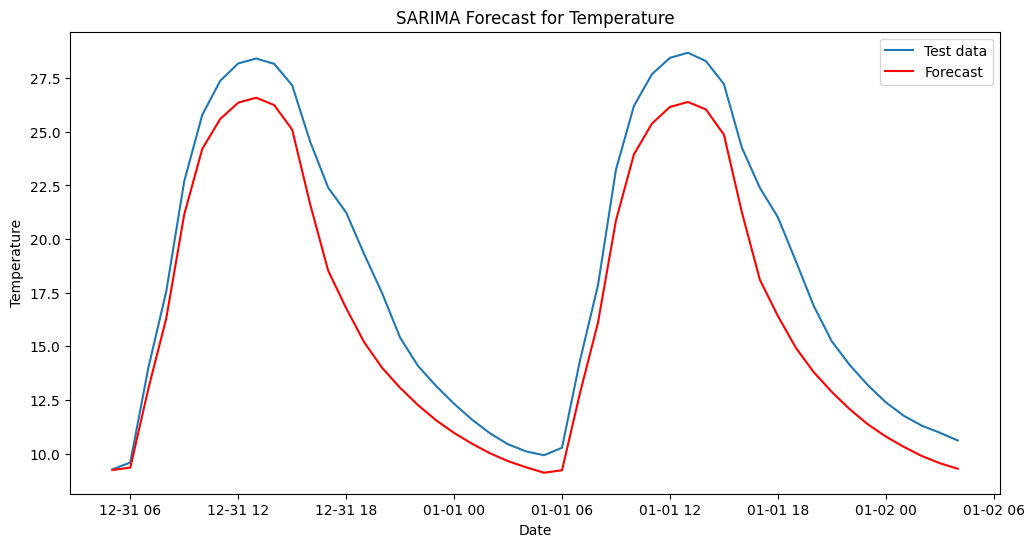

Root Mean Squared Error (RMSE): 2.3121690998579614
training now:  3


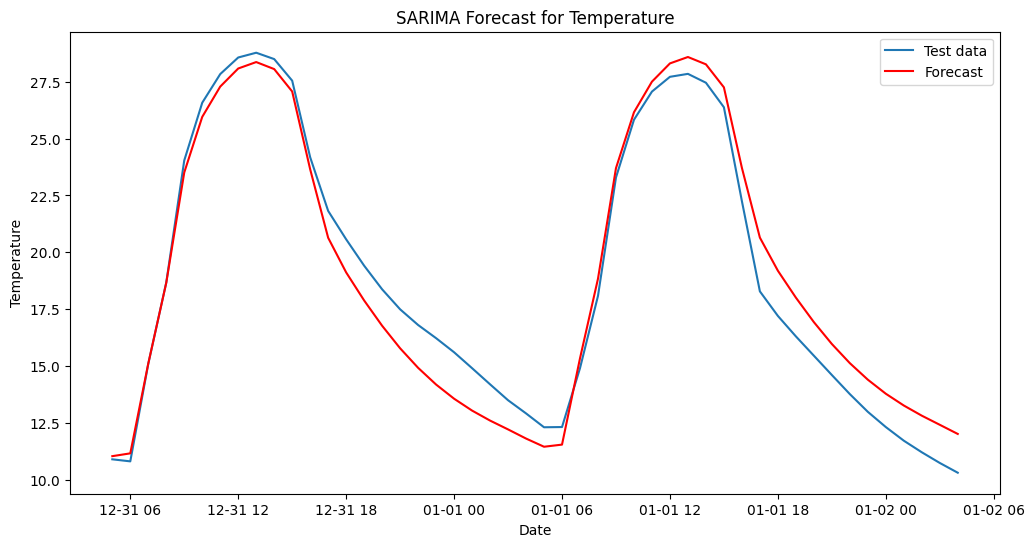

Root Mean Squared Error (RMSE): 1.2469527864869028
training now:  4


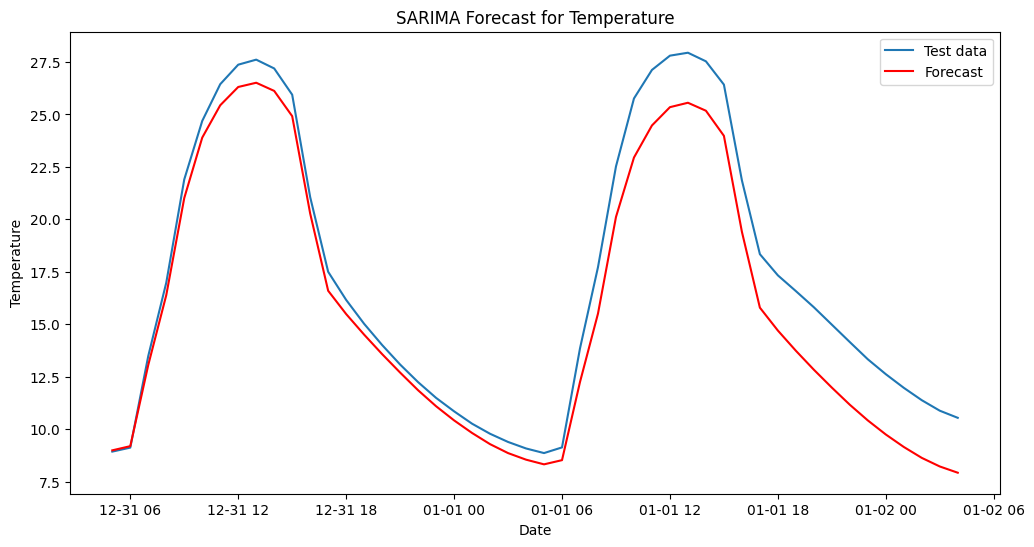

Root Mean Squared Error (RMSE): 1.8485299222989384
training now:  5


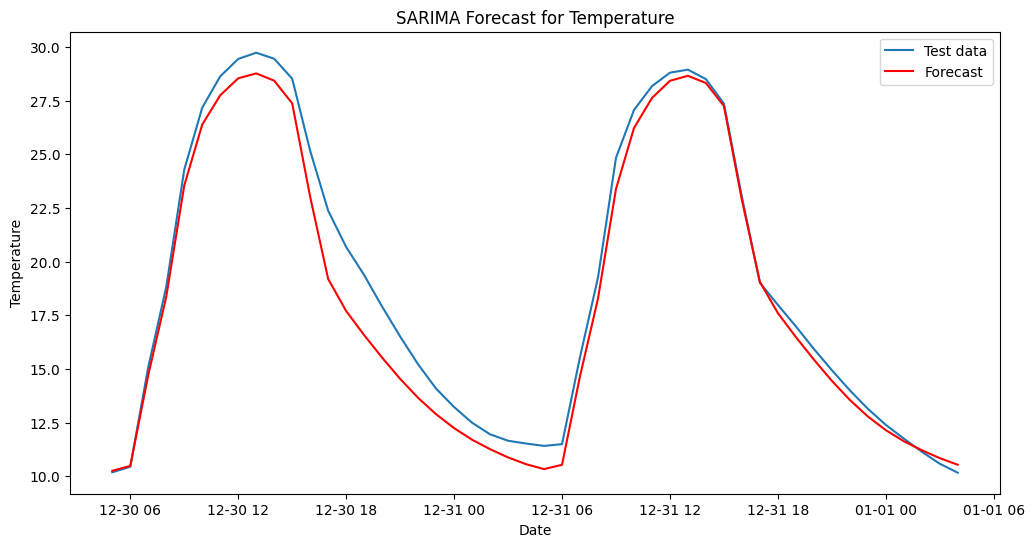

Root Mean Squared Error (RMSE): 1.151286928387869
training now:  6


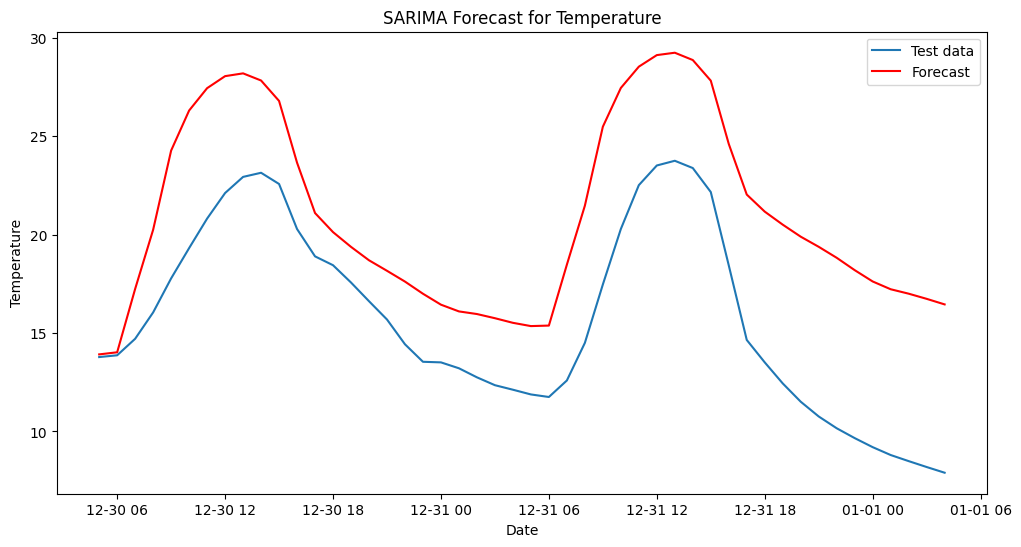

Root Mean Squared Error (RMSE): 5.813612695959001
training now:  7


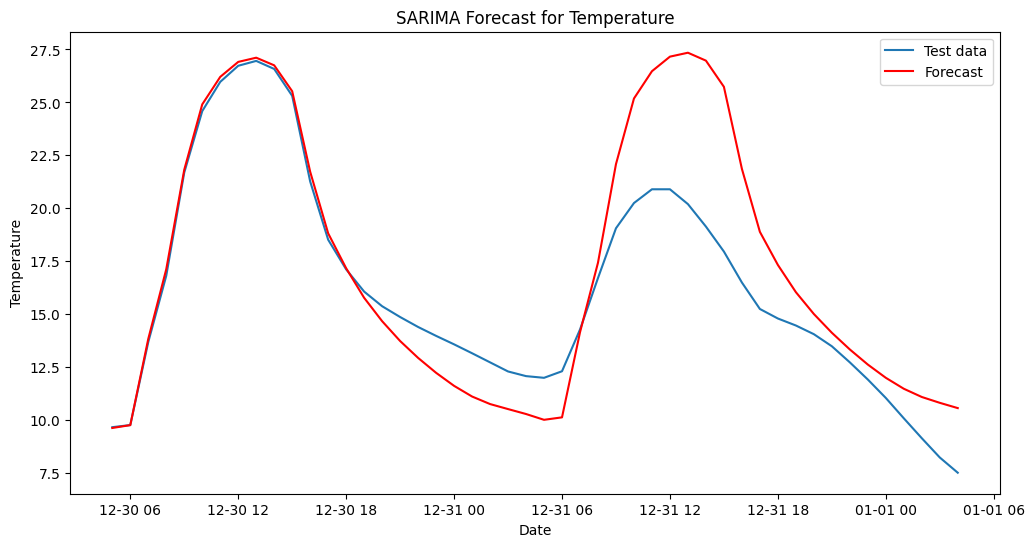

Root Mean Squared Error (RMSE): 2.8416590034850024
training now:  8


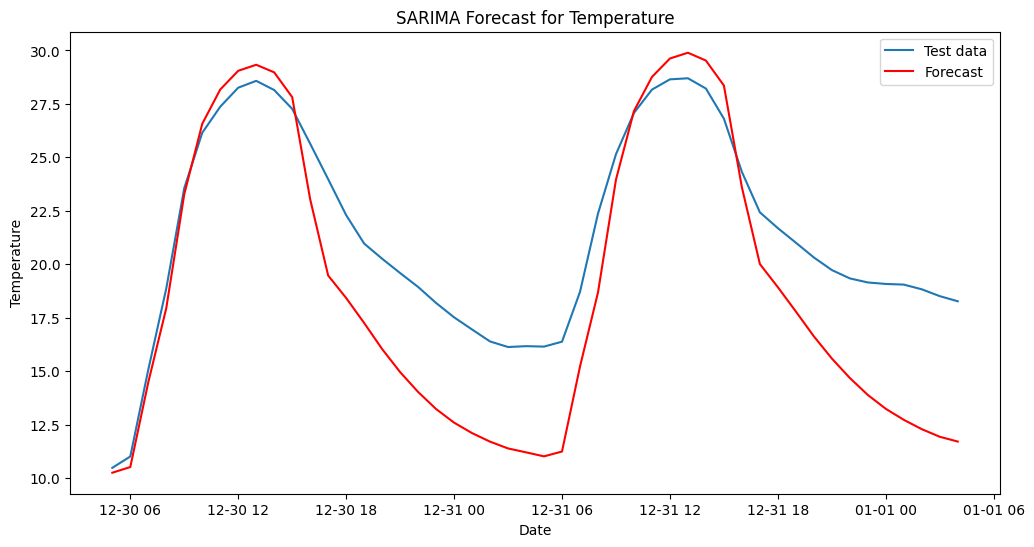

Root Mean Squared Error (RMSE): 3.707812203629616
training now:  9


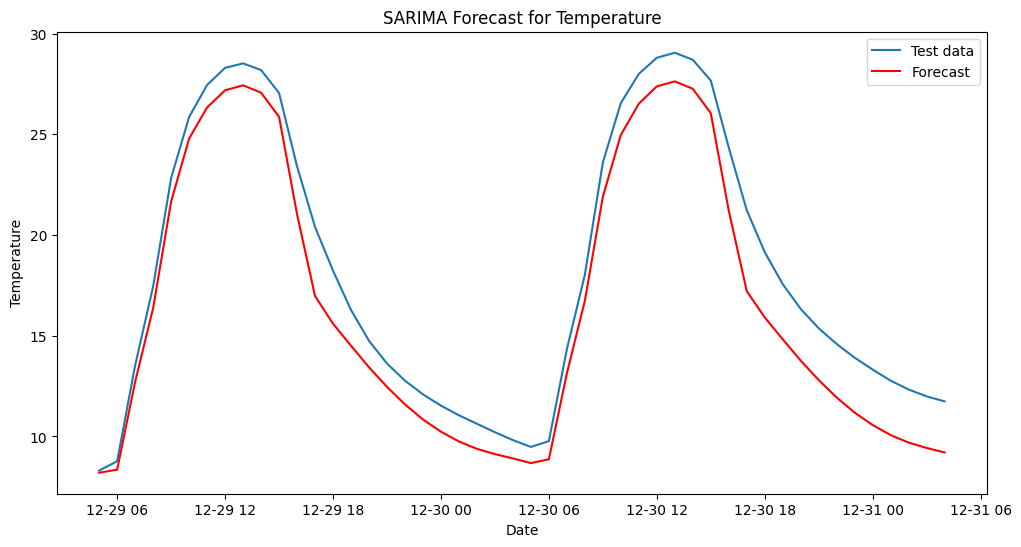

Root Mean Squared Error (RMSE): 1.929020310983146
training now:  10


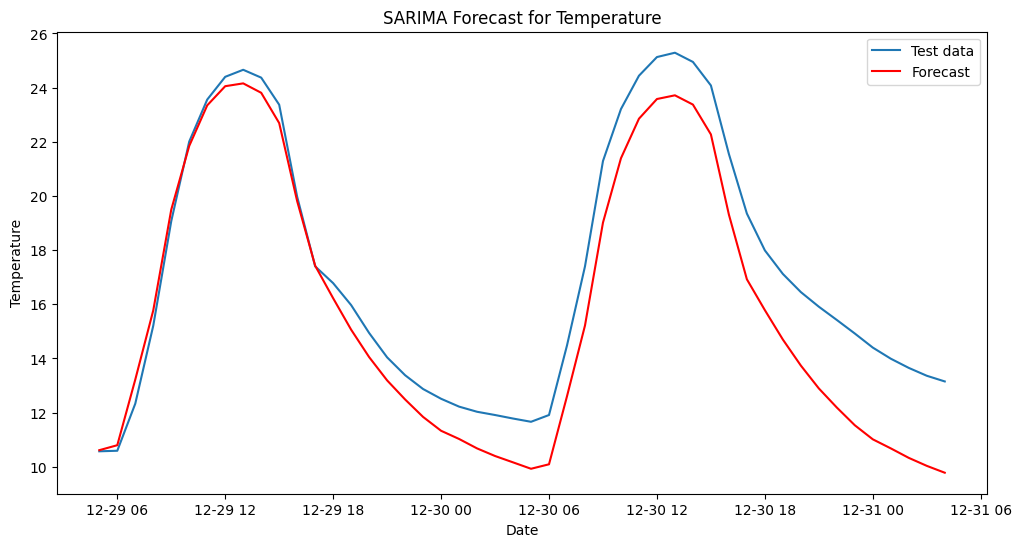

Root Mean Squared Error (RMSE): 1.8756695170567308
training now:  11


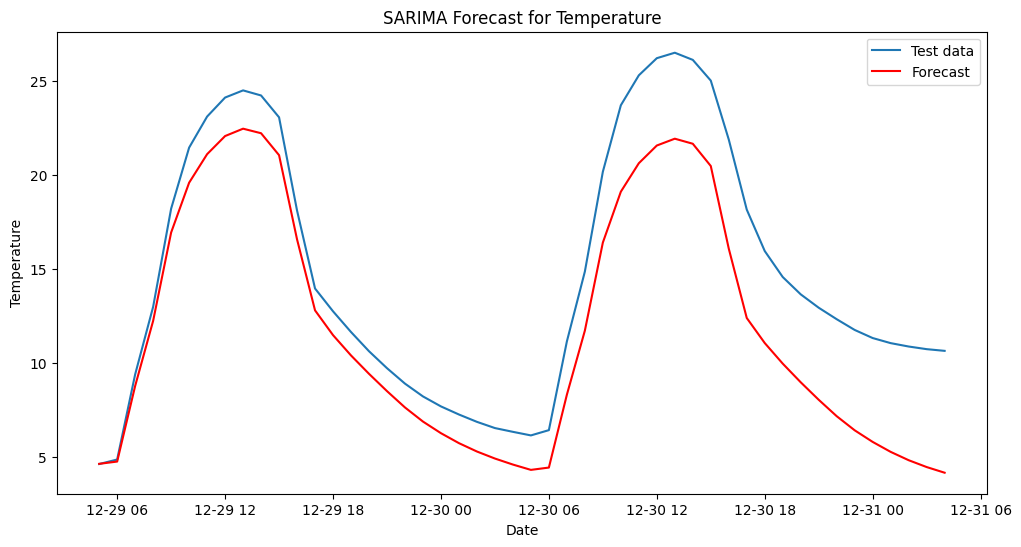

Root Mean Squared Error (RMSE): 3.5660944996699566
training now:  12


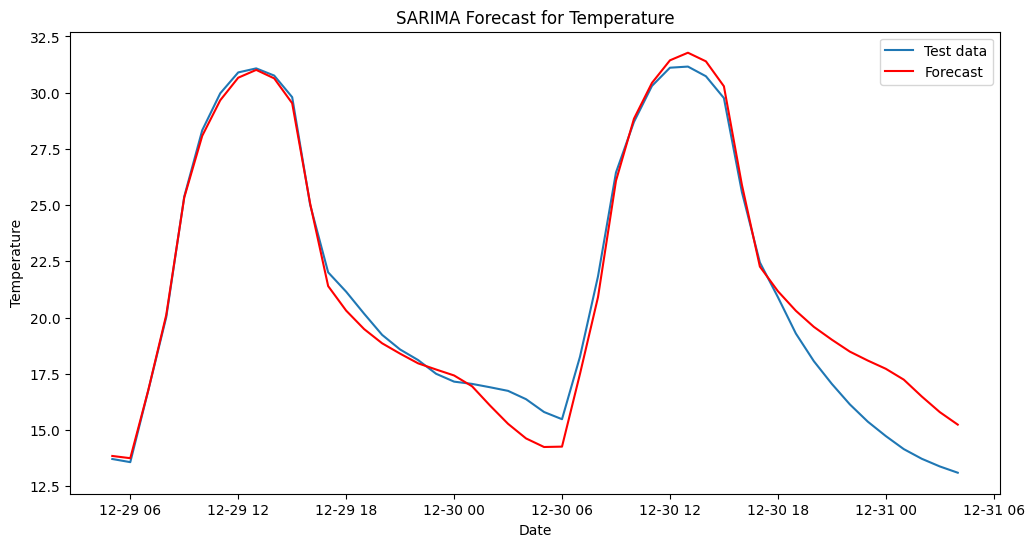

Root Mean Squared Error (RMSE): 1.222110584196047
training now:  13


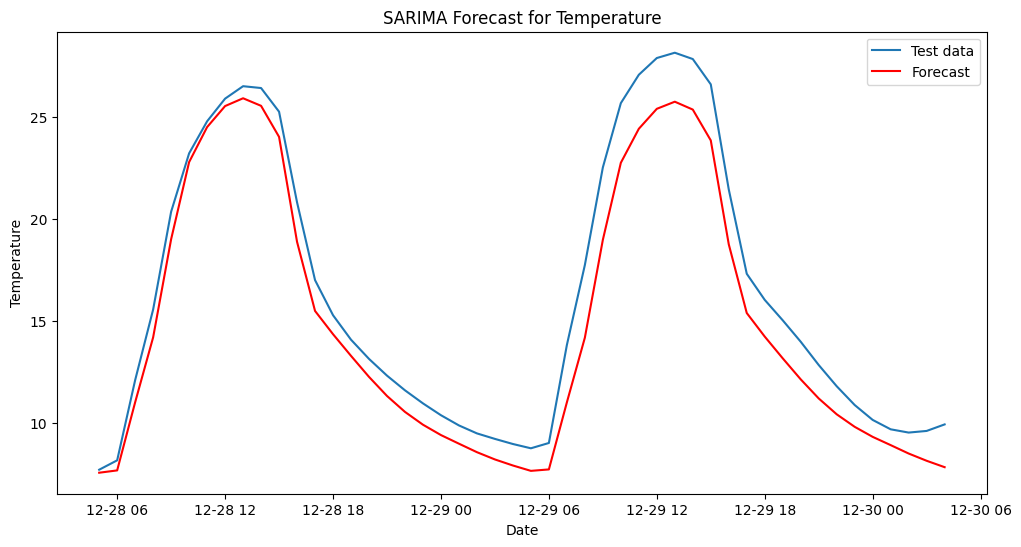

Root Mean Squared Error (RMSE): 1.6904801730979275
training now:  14


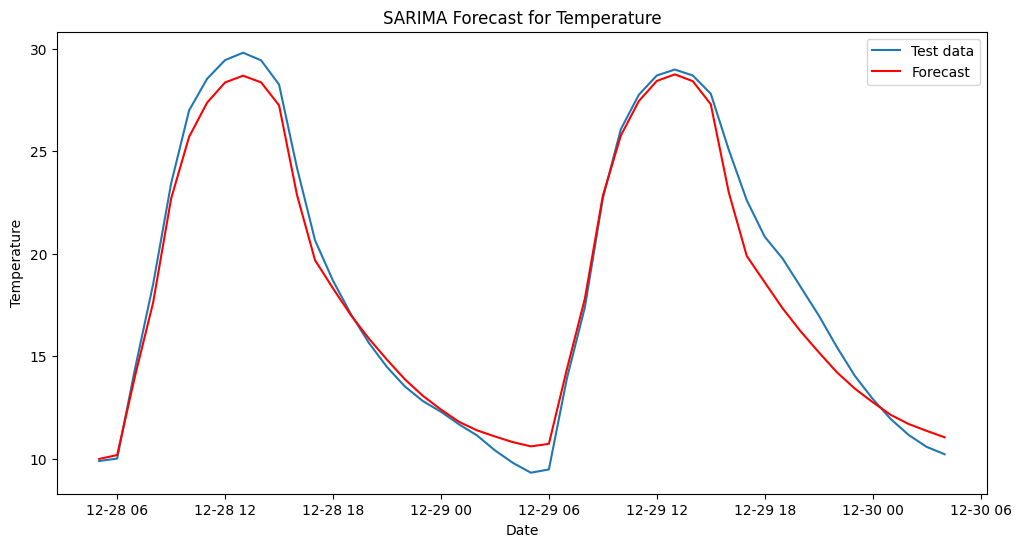

Root Mean Squared Error (RMSE): 1.0422649288203254
training now:  15


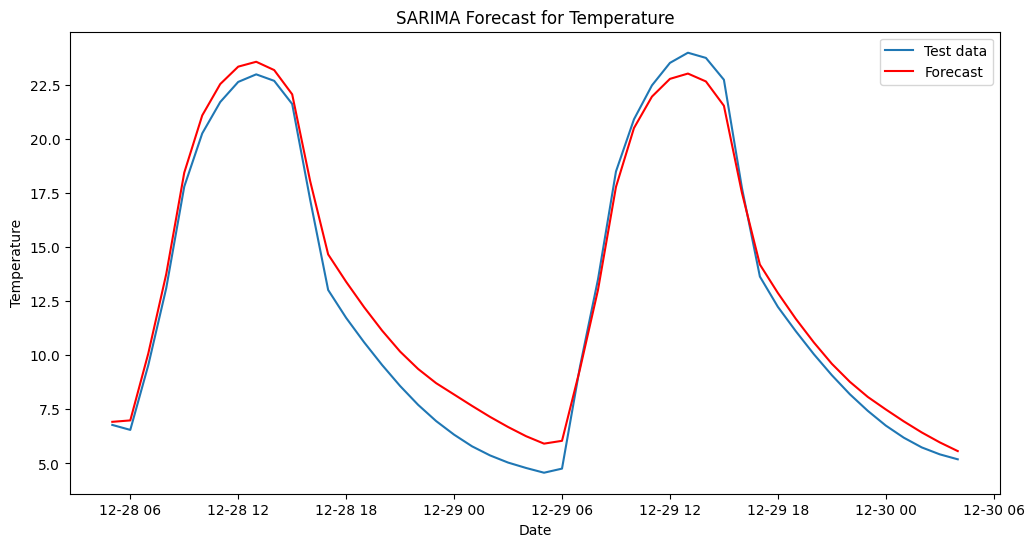

Root Mean Squared Error (RMSE): 1.0406363015948232
training now:  16


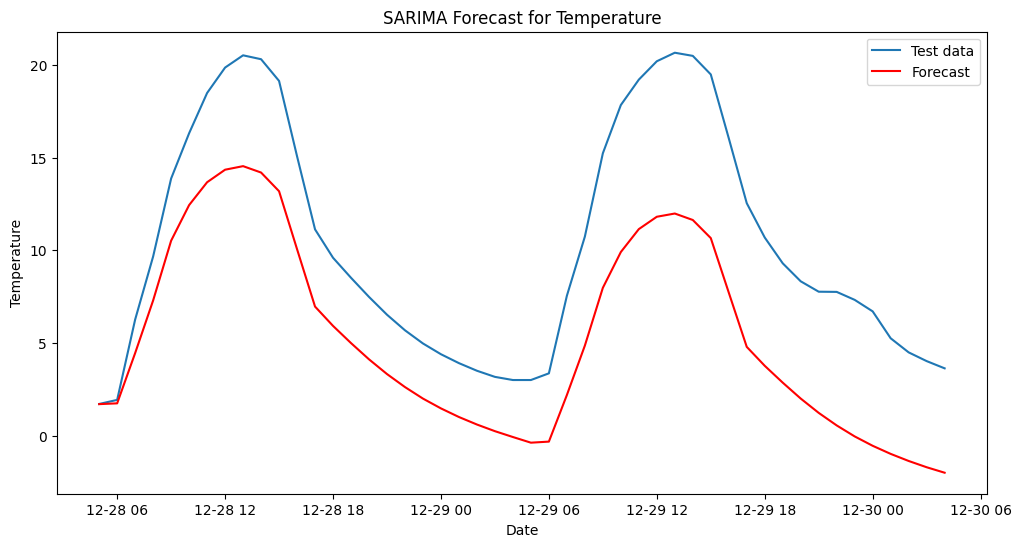

Root Mean Squared Error (RMSE): 5.617463365476708
training now:  17


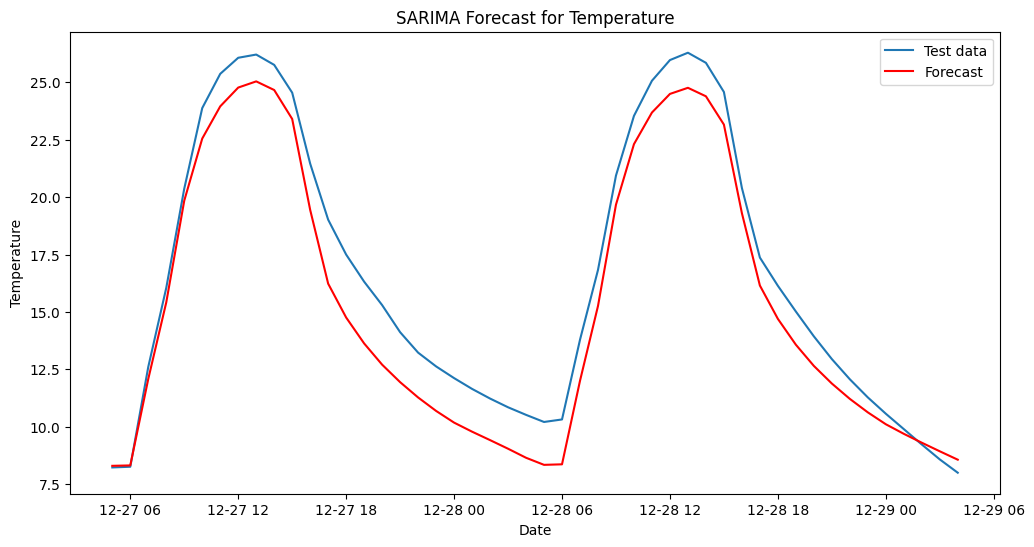

Root Mean Squared Error (RMSE): 1.5225939724991613
training now:  18


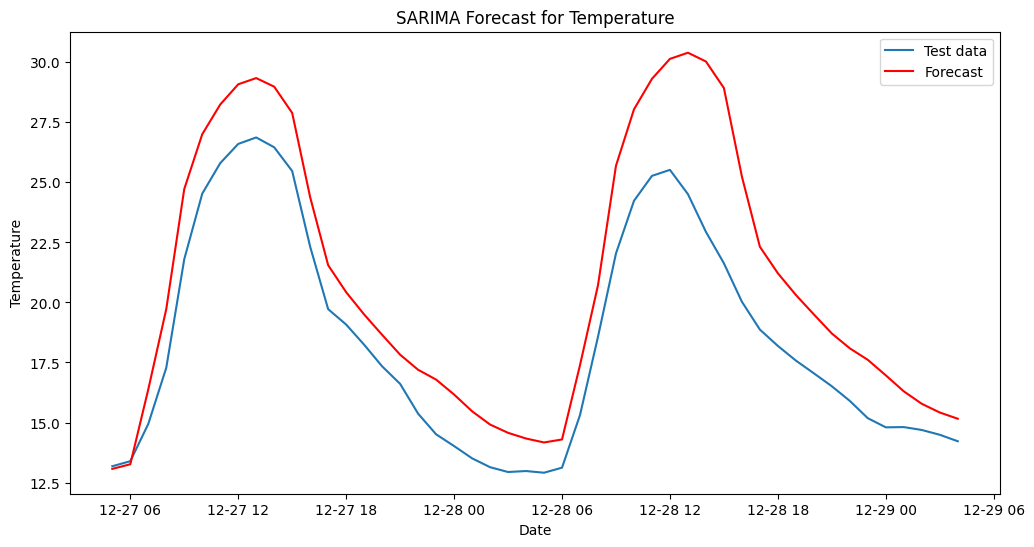

Root Mean Squared Error (RMSE): 2.86748741590905
training now:  19


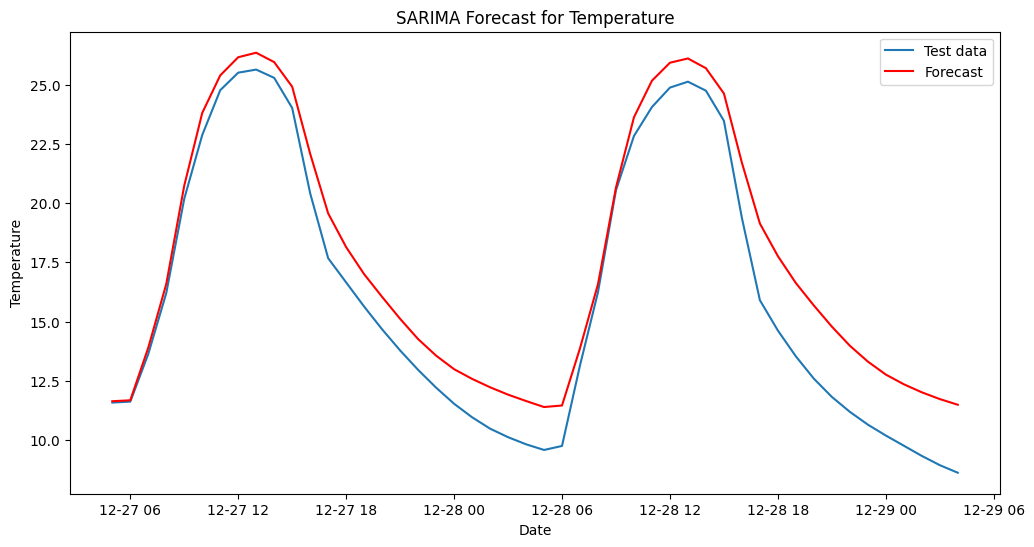

Root Mean Squared Error (RMSE): 1.7910612023312151
training now:  20


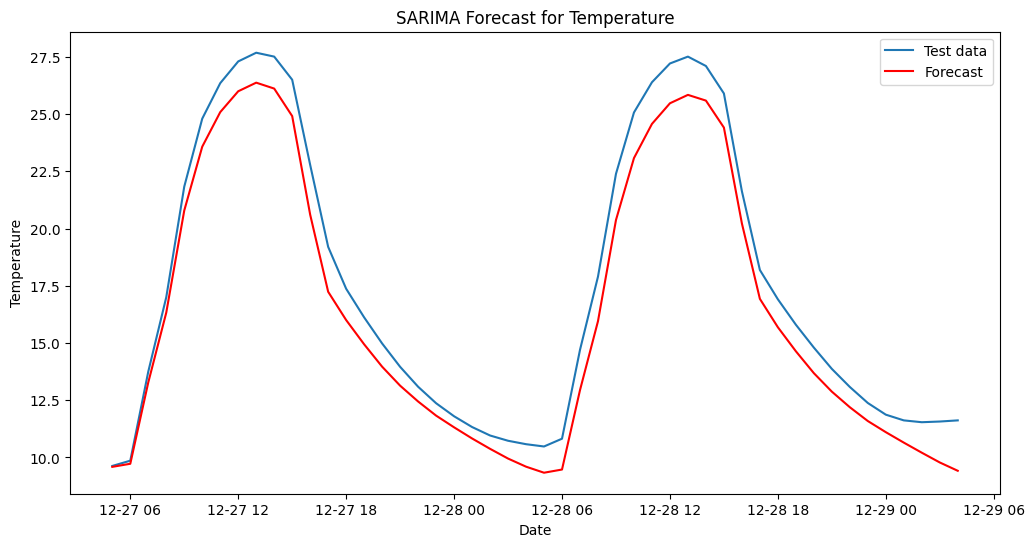

Root Mean Squared Error (RMSE): 1.3107329472113698


In [30]:
for i in range(2, 21):
    #check2=train_data[table[i-2]:table[i-1]]
    #test2=train_data[table[i-1]:table[i-1]+48] #2 days = 48 hours
    # Splitting data into train and test sets
    train_data = data[table[i-2]:table[i-1]]  # 1 year data
    test_data = data[table[i-1]:table[i-1]+48]   # Use the last 48 hours for testing
    print("training now: ", i)
    #training
    jabalpur_result=jabalpur_result.extend(train_data["TEMP"])
    #forecasting
    forecast2 = jabalpur_result.get_forecast(steps=48)
    # Plot the predicted values along with the actual values
    plt.figure(figsize=(12, 6))
    plt.plot(test_data.index, test_data["TEMP"], label='Test data')
    plt.plot(forecast2.predicted_mean, label='Forecast', color='red')
    plt.title('SARIMA Forecast for Temperature')
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.legend()
    plt.show()
    #RMSE
    rmse = np.sqrt(mean_squared_error(test_data["TEMP"], forecast2.predicted_mean))
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    # to store RMSE for every year
    rmse_record[i] = rmse

In [31]:
rmse_record

{1: 2.14615835835248,
 2: 2.3121690998579614,
 3: 1.2469527864869028,
 4: 1.8485299222989384,
 5: 1.151286928387869,
 6: 5.813612695959001,
 7: 2.8416590034850024,
 8: 3.707812203629616,
 9: 1.929020310983146,
 10: 1.8756695170567308,
 11: 3.5660944996699566,
 12: 1.222110584196047,
 13: 1.6904801730979275,
 14: 1.0422649288203254,
 15: 1.0406363015948232,
 16: 5.617463365476708,
 17: 1.5225939724991613,
 18: 2.86748741590905,
 19: 1.7910612023312151,
 20: 1.3107329472113698}

In [32]:
forecast2.predicted_mean

2023-12-27 05:00:00     9.590122
2023-12-27 06:00:00     9.724850
2023-12-27 07:00:00    13.279061
2023-12-27 08:00:00    16.328211
2023-12-27 09:00:00    20.786875
2023-12-27 10:00:00    23.575899
2023-12-27 11:00:00    25.084672
2023-12-27 12:00:00    25.996400
2023-12-27 13:00:00    26.372256
2023-12-27 14:00:00    26.114058
2023-12-27 15:00:00    24.911948
2023-12-27 16:00:00    20.606481
2023-12-27 17:00:00    17.238557
2023-12-27 18:00:00    16.002584
2023-12-27 19:00:00    14.943364
2023-12-27 20:00:00    13.965390
2023-12-27 21:00:00    13.136662
2023-12-27 22:00:00    12.445407
2023-12-27 23:00:00    11.828530
2023-12-28 00:00:00    11.316740
2023-12-28 01:00:00    10.830357
2023-12-28 02:00:00    10.377761
2023-12-28 03:00:00     9.952431
2023-12-28 04:00:00     9.597927
2023-12-28 05:00:00     9.333740
2023-12-28 06:00:00     9.473277
2023-12-28 07:00:00    12.942318
2023-12-28 08:00:00    15.953619
2023-12-28 09:00:00    20.372344
2023-12-28 10:00:00    23.077390
2023-12-28

In [33]:
train_data=data[175200:]

In [34]:
jabalpur_result=jabalpur_result.extend(train_data["TEMP"])
forecast2 = jabalpur_result.get_forecast(steps=48)


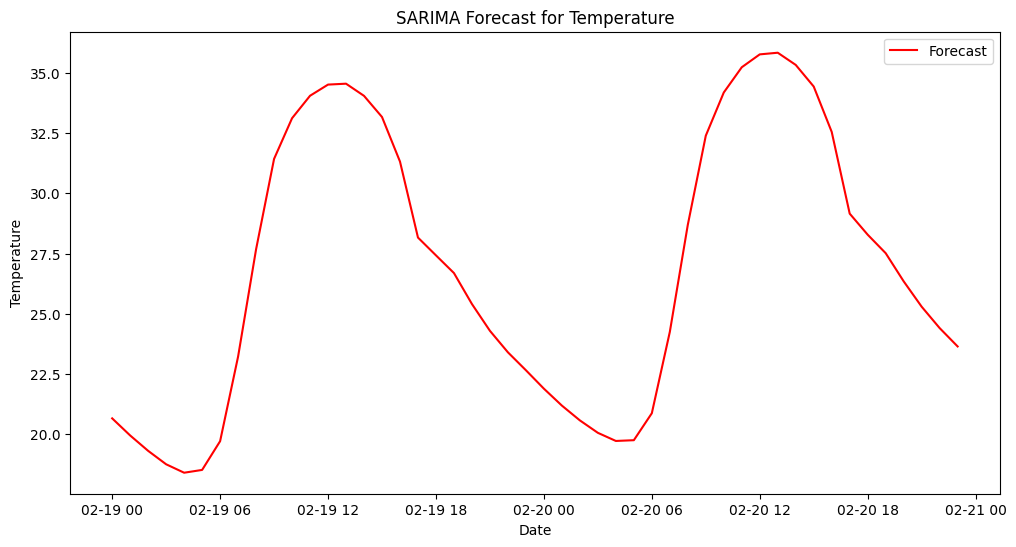

In [35]:
# Plot the predicted values along with the actual values
plt.figure(figsize=(12, 6))
#plt.plot(test_data.index, test_data["TEMP"], label='Test data')
plt.plot(forecast2.predicted_mean, label='Forecast', color='red')
plt.title('SARIMA Forecast for Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [36]:
#saving pickle file of model
with open("/kaggle/working/jabalpur_model.pkl", 'wb') as f:
    pickle.dump(jabalpur_result, f)

In [37]:
forecast2.predicted_mean

2024-02-19 00:00:00    20.662154
2024-02-19 01:00:00    19.952805
2024-02-19 02:00:00    19.314503
2024-02-19 03:00:00    18.757019
2024-02-19 04:00:00    18.406928
2024-02-19 05:00:00    18.522989
2024-02-19 06:00:00    19.714930
2024-02-19 07:00:00    23.226641
2024-02-19 08:00:00    27.678128
2024-02-19 09:00:00    31.428747
2024-02-19 10:00:00    33.117304
2024-02-19 11:00:00    34.049380
2024-02-19 12:00:00    34.512329
2024-02-19 13:00:00    34.550167
2024-02-19 14:00:00    34.045241
2024-02-19 15:00:00    33.167963
2024-02-19 16:00:00    31.317392
2024-02-19 17:00:00    28.164366
2024-02-19 18:00:00    27.425945
2024-02-19 19:00:00    26.691676
2024-02-19 20:00:00    25.407212
2024-02-19 21:00:00    24.295036
2024-02-19 22:00:00    23.402909
2024-02-19 23:00:00    22.659402
2024-02-20 00:00:00    21.894339
2024-02-20 01:00:00    21.192401
2024-02-20 02:00:00    20.578358
2024-02-20 03:00:00    20.062403
2024-02-20 04:00:00    19.724985
2024-02-20 05:00:00    19.756321
2024-02-20